In [25]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

productSchema = StructType([
    StructField("ProductID", IntegerType()),
    StructField("ProductNumber", StringType()),
    StructField("ProductName", StringType()),
    StructField("ModelName", StringType()),
    StructField("MakeFlag", IntegerType()),
    StructField("StandardCost", StringType()),
    StructField("ListPrice", FloatType()),
    StructField("SubCategoryID", IntegerType())
    ])

df = spark.read.option('header','true') \
               .option('delimiter',',') \
               .schema(productSchema) \
               .csv('products.csv')
df = df.withColumn("ListPrice", df["ListPrice"]+10)
df.printSchema()
df.show()

root
 |-- ProductID: integer (nullable = true)
 |-- ProductNumber: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- ModelName: string (nullable = true)
 |-- MakeFlag: integer (nullable = true)
 |-- StandardCost: string (nullable = true)
 |-- ListPrice: float (nullable = true)
 |-- SubCategoryID: integer (nullable = true)

+---------+-------------+--------------------+--------------------+--------+------------+---------+-------------+
|ProductID|ProductNumber|         ProductName|           ModelName|MakeFlag|StandardCost|ListPrice|SubCategoryID|
+---------+-------------+--------------------+--------------------+--------+------------+---------+-------------+
|      680|   FR-R92B-58|HL Road Frame - B...|       HL Road Frame|       1|     1059.31|   1441.5|           14|
|      706|   FR-R92R-58|HL Road Frame - R...|       HL Road Frame|       1|     1059.31|   1441.5|           14|
|      707|    HL-U509-R|Sport-100 Helmet,...|           Sport-100|       0|     1

In [26]:
df.createOrReplaceTempView("products")

In [63]:
from matplotlib import pyplot as plt

# Get the data as a Pandas dataframe
temp = spark.sql("SELECT ModelName, COUNT(ProductID) AS ProductCount FROM products \
                  GROUP BY ModelName \
                  ORDER BY ModelName")

temp.createOrReplaceTempView("productcount")
data = spark.sql("SELECT ModelName, ProductCount FROM productcount \
                  WHERE ProductCount > 1").toPandas()

<Figure size 432x288 with 0 Axes>

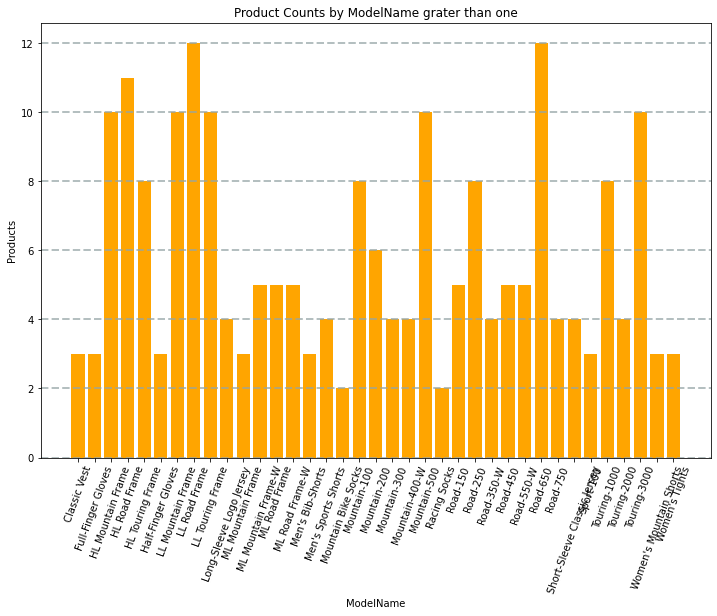

In [65]:
# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(12,8))

# Create a bar plot of product counts by ModelName
plt.bar(x=data['ModelName'], height=data['ProductCount'], color='orange')

# Customize the chart
plt.title('Product Counts by ModelName grater than one')
plt.xlabel('ModelName')
plt.ylabel('Products')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=70)

# Show the plot area
plt.show()